In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import os 
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv('C:/Users/mulin/drug.csv')

In [10]:
df.columns = df.columns.str.lower()

In [11]:
cat_col = list(df.dtypes[df.dtypes=='object'].index)

In [12]:
num_col = list(df.dtypes[df.dtypes!='object'].index)

In [13]:
df.shape

(200, 6)

# EDA

In [14]:
df.isnull().sum()

age            0
sex            0
bp             0
cholesterol    0
na_to_k        0
drug           0
dtype: int64

In [15]:
df.dtypes

age              int64
sex             object
bp              object
cholesterol     object
na_to_k        float64
drug            object
dtype: object

Categorical columns

In [16]:
for c in cat_col:
     df[c] = df[c].str.lower().str.replace(' ', '_')

In [17]:
for c in cat_col:
    print(df[c].value_counts())
    print(' ')

m    104
f     96
Name: sex, dtype: int64
 
high      77
low       64
normal    59
Name: bp, dtype: int64
 
high      103
normal     97
Name: cholesterol, dtype: int64
 
drugy    91
drugx    54
druga    23
drugc    16
drugb    16
Name: drug, dtype: int64
 


Numerical Column

In [18]:
df.describe()

,age,na_to_k
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [19]:
skewness = {c:df[c].skew(axis=0) for c in num_col}
print(skewness)

{'age': 0.03030835703000607, 'na_to_k': 1.039341186028881}


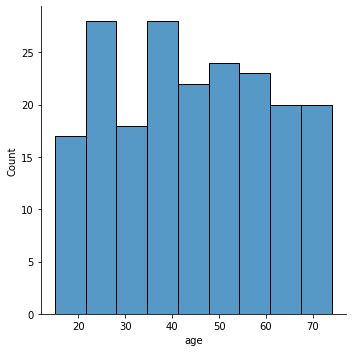

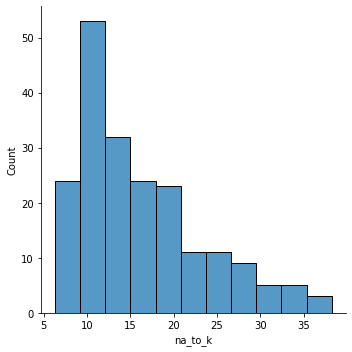

In [20]:
for c in num_col:
    sns.displot(df[c])

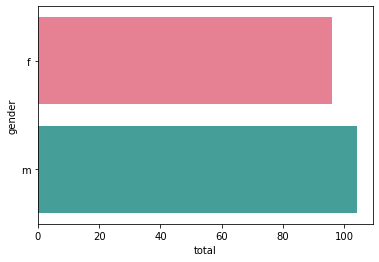

In [21]:
sns.countplot(y='sex',data=df,palette="husl")
plt.ylabel('gender')
plt.xlabel('total')
plt.show()

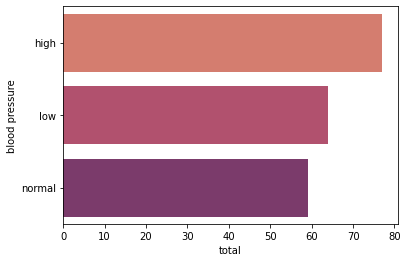

In [22]:
sns.countplot(y='bp',data=df,palette="flare")
plt.ylabel('blood pressure')
plt.xlabel('total')
plt.show()

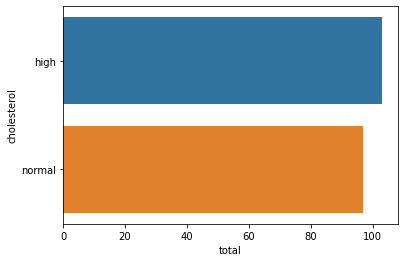

In [23]:
sns.countplot(y='cholesterol',data=df)
plt.ylabel('cholesterol')
plt.xlabel('total')
plt.show()

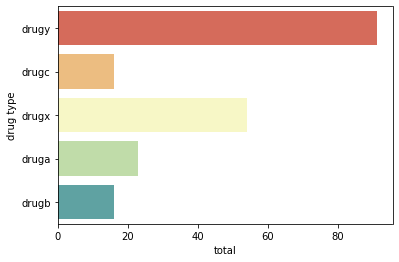

In [24]:
sns.countplot(y='drug',data=df,palette='Spectral')
plt.ylabel('drug type')
plt.xlabel('total')
plt.show()

# Data Preprocessing

In [25]:
age_bin = [0,19,29,39,49,59,69,80]
age_category = ['<18','20','30','40','50','60','>60']
df['age_cal']= pd.cut(df['age'],bins=age_bin,labels=age_category)
df = df.drop(['age'],axis=1)

In [26]:
df.head(5)

,sex,bp,cholesterol,na_to_k,drug,age_cal
0,f,high,high,25.355,drugy,20
1,m,low,high,13.093,drugc,40
2,m,low,high,10.114,drugc,40
3,f,normal,high,7.798,drugx,20
4,f,low,high,18.043,drugy,60


In [27]:
chemical_bin = [0,9,19,29,50]
chemical_category = ['<10','10-20','20-30','>30']
df['chemical_cal'] = pd.cut(df['na_to_k'],bins=chemical_bin,labels=chemical_category)
del df['na_to_k']

In [28]:
df.head(5)

,sex,bp,cholesterol,drug,age_cal,chemical_cal
0,f,high,high,drugy,20,20-30
1,m,low,high,drugc,40,10-20
2,m,low,high,drugc,40,10-20
3,f,normal,high,drugx,20,<10
4,f,low,high,drugy,60,10-20


# Validation Framework

In [29]:
X = df.drop(["drug"], axis=1)
y = df["drug"]

df_train, df_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [30]:
len(df_test)

60

# Feature Engineering

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [33]:
df_train.shape

(140, 5)

In [34]:
X_train.shape

(140, 18)

In [35]:
X_test.shape

(60, 18)

# SMOTE 

In [36]:
X_train_re,y_train_re = SMOTE().fit_resample(X_train,y_train)

In [37]:
X_train_re.shape

(320, 18)

In [38]:
y_train_re.shape

(320,)

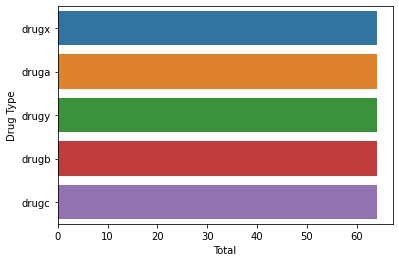

In [39]:
sns.countplot(y=y_train_re,data=df)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

# Training Models

Linear Regression

In [40]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_re, y_train_re)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


lr_acc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(lr_acc*100))

              precision    recall  f1-score   support

       druga       0.60      0.75      0.67         4
       drugb       0.86      1.00      0.92         6
       drugc       0.50      1.00      0.67         4
       drugx       0.83      1.00      0.90        19
       drugy       1.00      0.63      0.77        27

    accuracy                           0.82        60
   macro avg       0.76      0.88      0.79        60
weighted avg       0.87      0.82      0.82        60

[[ 3  1  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 2  0  4  4 17]]
Logistic Regression accuracy is: 81.67%


Decision Tree

In [41]:
dt_classifier = DecisionTreeClassifier( max_leaf_nodes=20)
dt_classifier.fit(X_train_re, y_train_re)

y_pred = dt_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
        
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))
print(' ')

              precision    recall  f1-score   support

       druga       0.50      0.75      0.60         4
       drugb       0.60      1.00      0.75         6
       drugc       0.50      0.75      0.60         4
       drugx       0.83      1.00      0.90        19
       drugy       0.93      0.52      0.67        27

    accuracy                           0.75        60
   macro avg       0.67      0.80      0.70        60
weighted avg       0.81      0.75      0.74        60

[[ 3  1  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  1]
 [ 0  0  0 19  0]
 [ 3  3  3  4 14]]
Decision Tree accuracy is: 75.00%
 


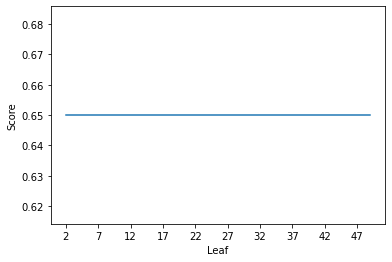

DT Acc Max 65.00%


In [42]:
score_dt= []
for i in range(2,50):
    dt_classifier = DecisionTreeClassifier( max_leaf_nodes=50)
    dt_classifier.fit(X_train_re, y_train_re)

    y_pred = dt_classifier.predict(X_test)
    score_dt.append(dt_classifier.score(X_test, y_test))
    
plt.plot(range(2,50), score_dt)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
dt_acc_max = max(score_dt)
print("DT Acc Max {:.2f}%".format(dt_acc_max*100))

Random Forest

In [43]:
rf = RandomForestClassifier(max_leaf_nodes=35)
rf.fit(X_train_re, y_train_re)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
rf_acc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(rf_acc*100))

              precision    recall  f1-score   support

       druga       0.25      0.25      0.25         4
       drugb       0.83      0.83      0.83         6
       drugc       0.33      0.50      0.40         4
       drugx       0.83      1.00      0.90        19
       drugy       0.71      0.56      0.63        27

    accuracy                           0.70        60
   macro avg       0.59      0.63      0.60        60
weighted avg       0.71      0.70      0.69        60

[[ 1  0  0  0  3]
 [ 0  5  0  0  1]
 [ 0  0  2  0  2]
 [ 0  0  0 19  0]
 [ 3  1  4  4 15]]
Random Forest accuracy is: 70.00%


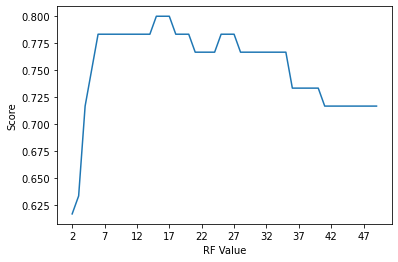

RF Acc Max 80.00%


In [44]:
score_rf= []
for i in range(2,50):
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rf.fit(X_train_re, y_train_re)
    score_rf.append(rf.score(X_test, y_test))
    
plt.plot(range(2,50), score_rf)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
rf_acc_max = max(score_rf)
print("RF Acc Max {:.2f}%".format(rf_acc_max *100))

In [45]:
compare = pd.DataFrame({'Model': ['Logistic Regression' ,'Decision Tree' ,'Random Forest'] ,
                        'Accuracy': [lr_acc*100,dt_acc_max*100, rf_acc_max*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,81.666667
2,Random Forest,80.000000
1,Decision Tree,65.000000


In [46]:
def train(df_train,y_train):
    train_dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_train_re,y_train_re = SMOTE().fit_resample(X_train,y_train)
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rf.fit(X_train_re,y_train_re)
    return dv,rf

In [47]:
train(df_train,y_train)

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_leaf_nodes=49, n_estimators=1000, random_state=1))

In [48]:
def test(df_test,dv,model):
    test_dicts = df_test.to_dict(orient='records')
    X_test = dv.transform(test_dicts)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return y_pred

In [49]:
test(df_test,dv,rf)

              precision    recall  f1-score   support

       druga       0.25      0.25      0.25         4
       drugb       0.83      0.83      0.83         6
       drugc       0.33      0.50      0.40         4
       drugx       0.83      1.00      0.90        19
       drugy       0.71      0.56      0.63        27

    accuracy                           0.70        60
   macro avg       0.59      0.63      0.60        60
weighted avg       0.71      0.70      0.69        60

[[ 1  0  0  0  3]
 [ 0  5  0  0  1]
 [ 0  0  2  0  2]
 [ 0  0  0 19  0]
 [ 3  1  4  4 15]]


array(['drugx', 'drugy', 'drugx', 'drugc', 'drugy', 'drugx', 'drugx',
       'drugc', 'drugc', 'drugy', 'drugx', 'drugc', 'drugy', 'drugx',
       'drugy', 'druga', 'drugx', 'drugx', 'drugb', 'druga', 'drugx',
       'drugx', 'drugx', 'drugc', 'drugb', 'drugx', 'drugx', 'drugy',
       'drugy', 'drugx', 'drugy', 'drugc', 'druga', 'drugy', 'drugy',
       'drugy', 'drugy', 'drugy', 'drugy', 'drugx', 'drugy', 'drugy',
       'drugy', 'drugx', 'drugb', 'drugy', 'drugx', 'drugx', 'drugy',
       'drugb', 'drugy', 'drugx', 'drugy', 'druga', 'drugb', 'drugx',
       'drugx', 'drugx', 'drugx', 'drugb'], dtype=object)

In [60]:
test_1 = df_test.to_dict(orient='records')

In [61]:
test_1 = {'sex': 'm',
  'bp': 'normal',
  'cholesterol': 'normal',
  'age_cal': '60',
  'chemical_cal': '10-20'}

In [62]:
X = dv.transform([test_1])
y_pred = rf.predict_proba(X)[0, 1]

In [63]:
print('input:',test_1)
print('output:', y_pred)

input: {'sex': 'm', 'bp': 'normal', 'cholesterol': 'normal', 'age_cal': '60', 'chemical_cal': '10-20'}
output: 0.006991534391534391
